In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing the dataset
dataset_new = pd.read_excel('Dataset3.xlsx')
dataset_new['Charge_type'] = dataset_new['Charge_type'].astype('category')
dataset_new.describe(include='category')

,Charge_type
count,546
unique,2
top,CompB
freq,280


In [2]:
dataset = dataset_new.rename(columns={'Charge_type': 'Charge type',
                            'Charge_size' : 'Charge size',
                            'Standoff_distance' : 'Standoff distance',
                            'Incident_pressure' : 'Peak incident pressure'})

In [3]:
dataset.corr()

,Charge size,Standoff distance,Peak incident pressure
Charge size,1.000000e+00,4.052073e-16,0.146139
Standoff distance,4.052073e-16,1.000000e+00,-0.445655
Peak incident pressure,1.461391e-01,-4.456551e-01,1.000000


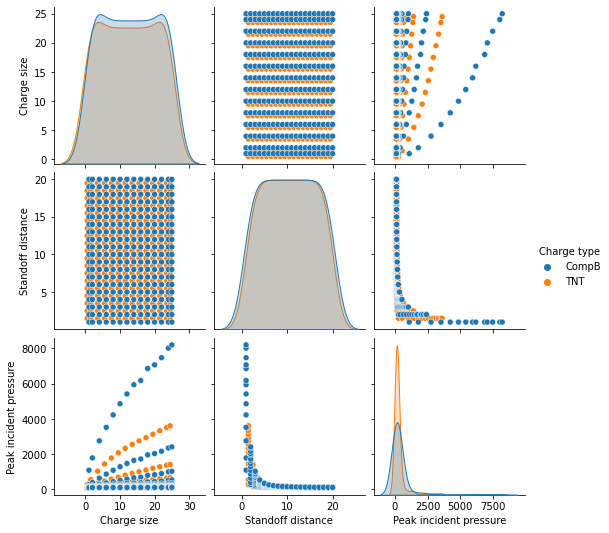

In [8]:
sns.pairplot(dataset, hue = 'Charge type')

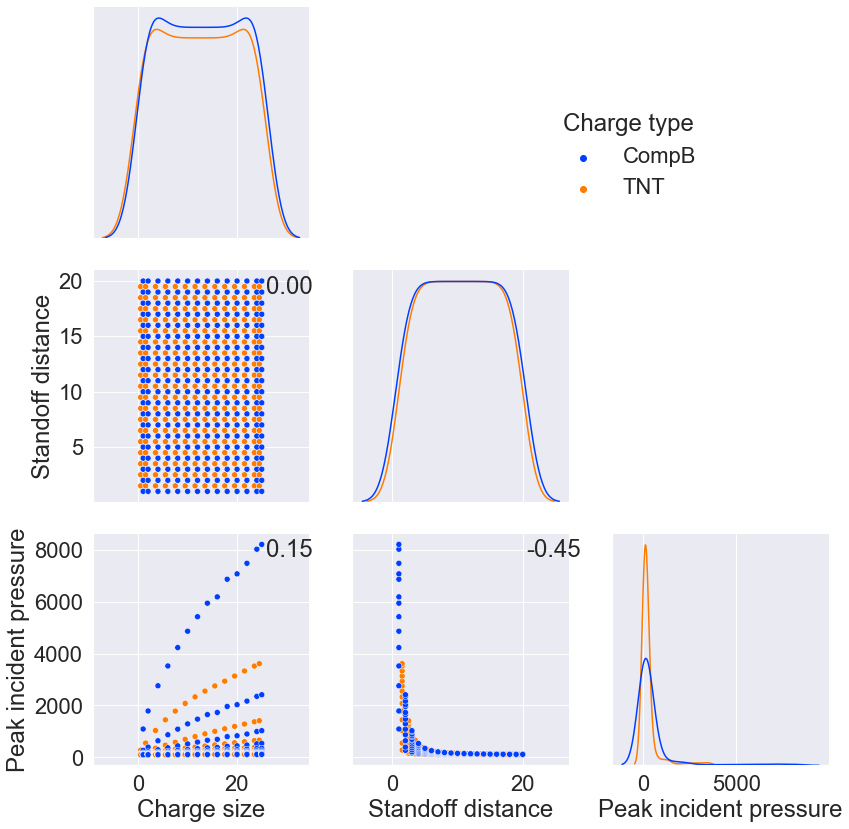

In [9]:
# Calculate the value
corrMatrix = dataset.corr(method = 'pearson')

# Set the font scale for the plot
sns.set(font_scale=2)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge type",
                    vars = ["Charge size", "Standoff distance", "Peak incident pressure"],
                    palette="bright",
                    diag_sharey=False,
                    corner=True,
                    height = 4)

# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot)

# Map a histogram to the diagonal
grid.map_diag(sns.kdeplot)

# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend(loc = (0.65,0.75))

# Add correlation coefficients to the plot
for i, j in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
    r = corrMatrix.iloc[i, j]
    grid.axes[i, j].annotate(f"{r:.2f}", xy=(.8, .9), xycoords='axes fraction')


sns.despine()
plt.show()

KeyError: 1

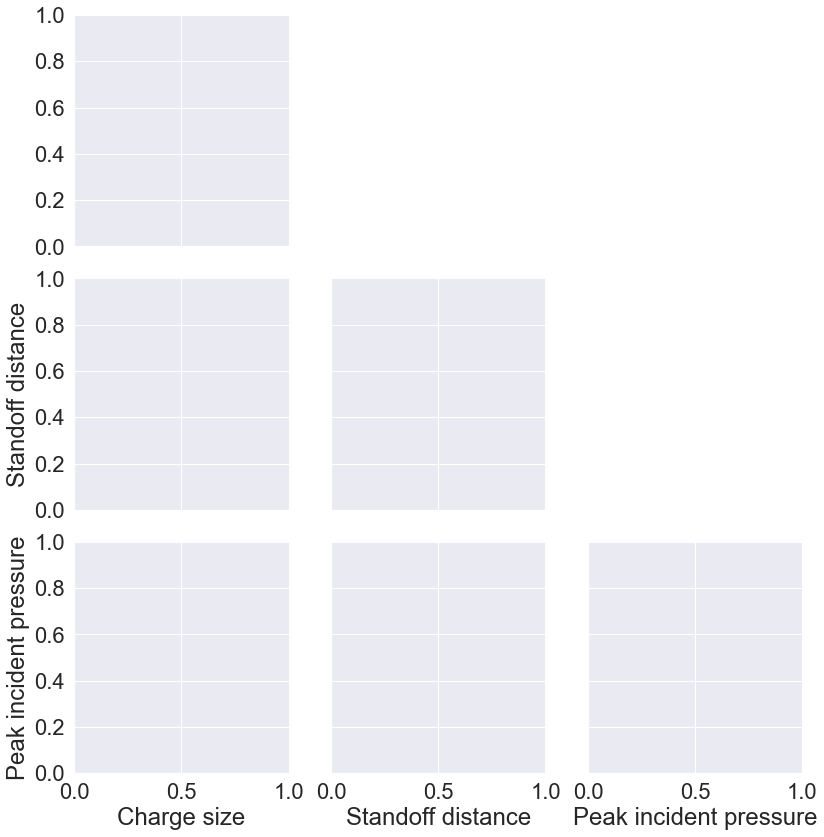

In [46]:
# Calculate the value
corrMatrix = dataset.corr(method = 'kendall')

# Set the font scale for the plot
sns.set(font_scale=2)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge type",
                    vars = ["Charge size", "Standoff distance", "Peak incident pressure"],
                    palette = "bright",
                    diag_sharey = False,
                    corner = True,
                    height = 4)
#g.map_offdiag(sns.scatterplot, marker='o', hue_kws={"marker": {"Male": "^", "Female": "s"}})

# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot, marker = {"CompB": "^", "TNT": "s"})

# Map a histogram to the diagonal
grid.map_diag(sns.kdeplot)

# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend(loc = (0.65,0.75))

# Add correlation coefficients to the plot
for i, j in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
    r = corrMatrix.iloc[i, j]
    grid.axes[i, j].annotate(f"{r:.2f}", xy=(.8, .9), xycoords='axes fraction')


sns.despine()
plt.show()

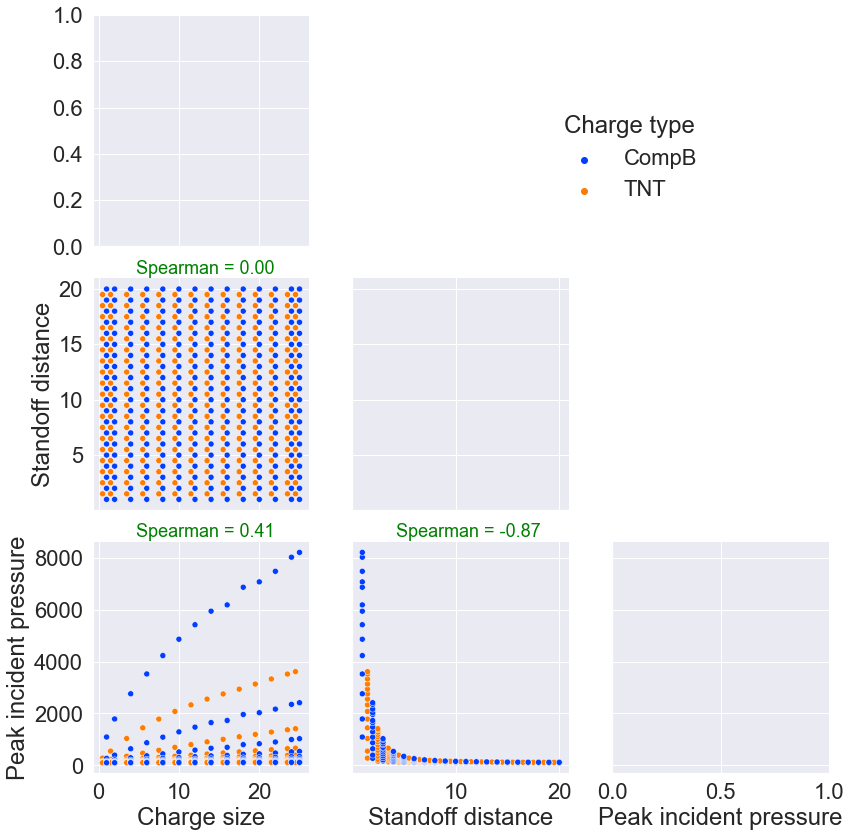

In [27]:
# Calculate the value
corrMatrix1 = dataset.corr(method = 'kendall')
corrMatrix2 = dataset.corr(method = 'spearman')

# Set the font scale for the plot
sns.set(font_scale=2)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge type",
                    vars = ["Charge size", "Standoff distance", "Peak incident pressure"],
                    palette="bright",
                    diag_sharey=False,
                    corner=True,
                    height = 4)

# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot)

# Map a histogram to the diagonal
#grid.map_diag(sns.kdeplot)


# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend(loc = (0.65,0.75))

# Add correlation coefficients to the plot
#for i, j in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
 #   r1 = corrMatrix1.iloc[i, j]
  #  grid.axes[i, j].annotate(f"K = {r1:.2f}", xy=(0.1, 1.02), xycoords='axes fraction', size = 18, color = 'Green')

# Add correlation coefficients to the plot
for l, m in zip(*plt.np.tril_indices_from(grid.axes, k=-1)):
    r2 = corrMatrix2.iloc[l, m]
    grid.axes[l, m].annotate(f"Spearman = {r2:.2f}", xy=(.2, 1.02), xycoords='axes fraction', size = 18, color = 'Green')


sns.despine()
plt.show()

                    Charge_size  Standoff_distance  Incident_pressure
Charge_size        1.000000e+00       4.052073e-16           0.146139
Standoff_distance  4.052073e-16       1.000000e+00          -0.445655
Incident_pressure  1.461391e-01      -4.456551e-01           1.000000


TypeError: type numpy.ndarray doesn't define __round__ method

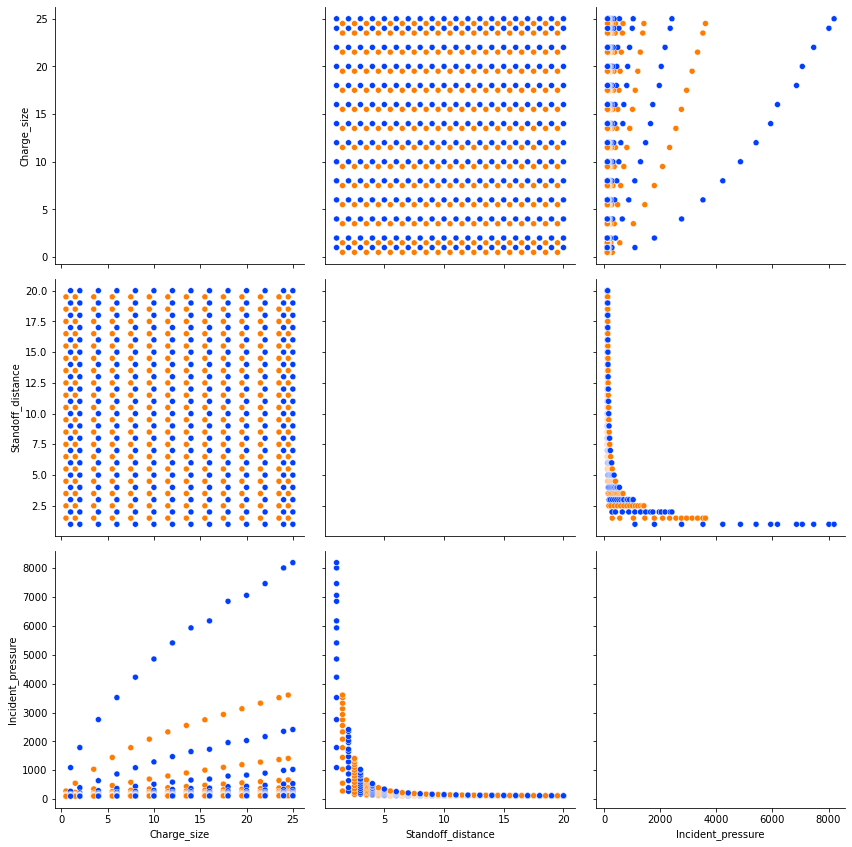

In [16]:
def corr(dataset):
    
    # Calculate the value
    corrMatrix = dataset.corr()
    print (corrMatrix)
    
    # Use the correlation matrix as labels
    labels = corrMatrix.values.flatten()

    # Make the label
    #label = str(round(corrMatrix, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(labels, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= dataset,
                    hue = "Charge_type",
                    vars = ["Charge_size", "Standoff_distance", "Incident_pressure"],
                    palette="bright",
                    height = 4)
# Map a scatter plot to the upper triangle
grid.map_offdiag(sns.scatterplot)
grid.map_offdiag(corr (dataset))
# Map a histogram to the diagonal
grid.map_diag(sns.histplot, bins = 10, 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid.add_legend()

#g = sns.PairGrid(penguins, hue="species")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

C:\Users\Chathura Gamage\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


                    Charge_size  Standoff_distance  Incident_pressure
Charge_size        1.000000e+00       4.052073e-16           0.146139
Standoff_distance  4.052073e-16       1.000000e+00          -0.445655
Incident_pressure  1.461391e-01      -4.456551e-01           1.000000


TypeError: corr() got an unexpected keyword argument 'color'

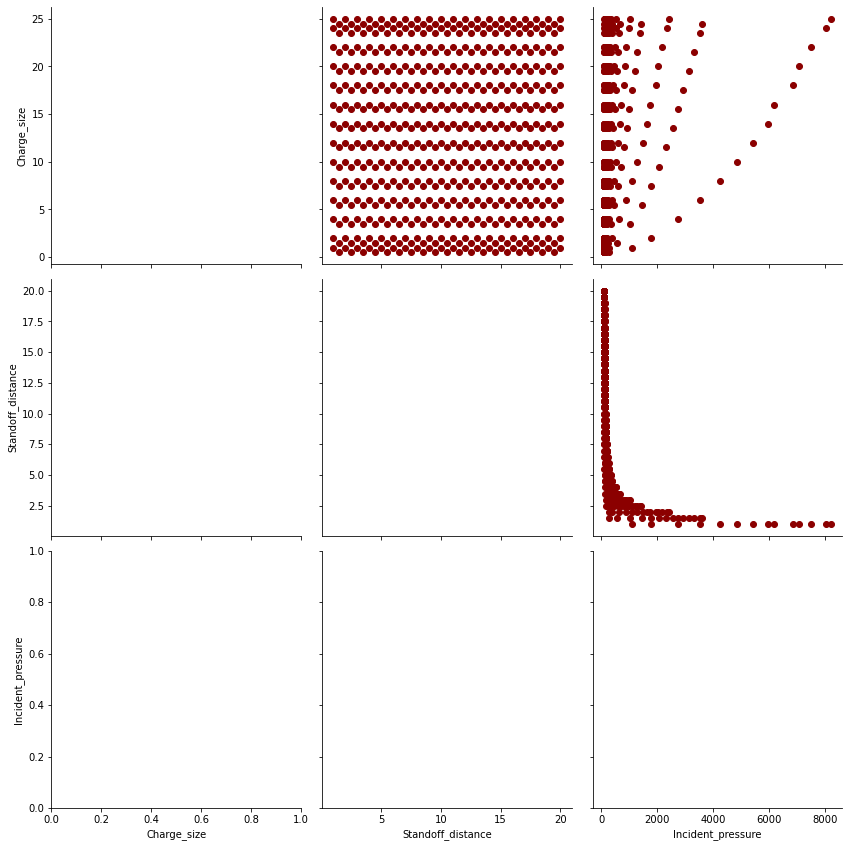

In [4]:
# Function to calculate correlation coefficient between two arrays
def corr(dataset):
    
    # Calculate the value
    corrMatrix = dataset.corr()
    print (corrMatrix)
    # Make the label
    label = str(round(corrMatrix, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= dataset, hue = 'Charge_type',
                    vars = ['Charge_size', 'Standoff_distance', 'Incident_pressure'], size = 4)
corrMatrix = dataset.corr()
print (corrMatrix)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

In [ ]:
import seaborn as sn
from pandas import DataFrame

t=['Charge_type', 'Charge_size', 'Standoff_distance','Incident_pressure']

s=abs(dataset[t].corr()['Incident_pressure'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(dataset[t],columns=t)
fig, ax = plt.subplots(figsize=(15,12),sharex=True, sharey=True) 
corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, cmap="hot", annot=True,annot_kws={"size": 18},ax=ax)

(0.0, 20.0)

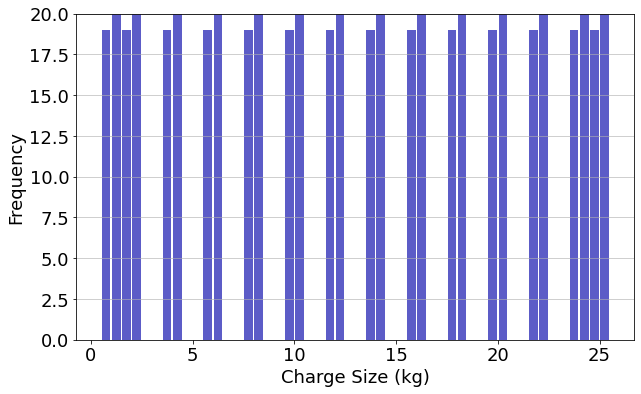

In [11]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Charge size'], bins= np.arange(dataset['Charge size'].min(), dataset['Charge size'].max()+1, 0.5), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge Size (kg)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 == 0 else maxfreq + 10)

(0.0, 16.0)

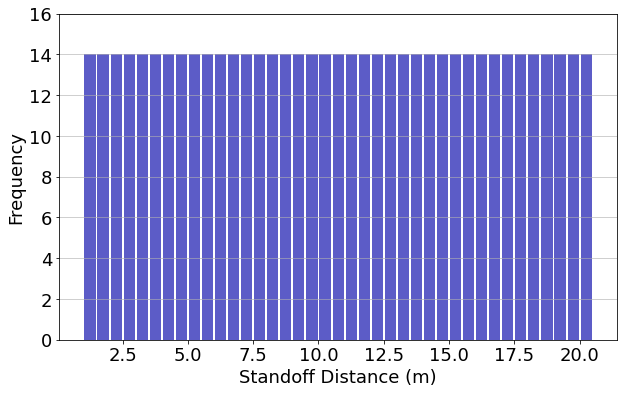

In [42]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Standoff distance'], bins= np.arange(dataset['Standoff distance'].min(), dataset['Standoff distance'].max()+1, 0.5), color='#0504aa',alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Standoff Distance (m)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 ==0 else maxfreq + 2)

maxfreq 89.0 9.0
103.175


(0.0, 99.0)

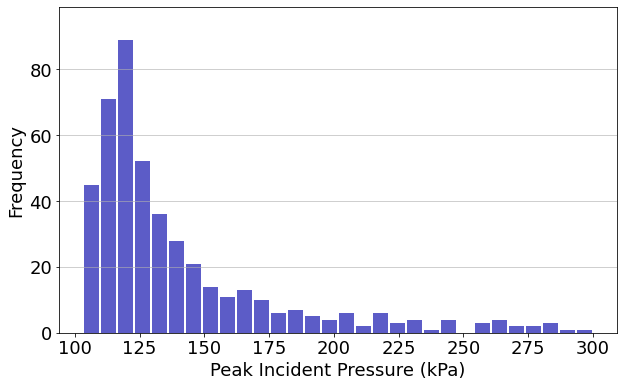

In [8]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Peak incident pressure'], bins= 30, range = (dataset['Peak incident pressure'].min(), 300), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peak Incident Pressure (kPa)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
print ('maxfreq',maxfreq, maxfreq % 10)
print (dataset['Peak incident pressure'].min())
# Set a clean upper y-axis limit.
plt.ylim(ymax=(np.ceil(maxfreq / 10)+1) * 10 if maxfreq % 10 == 0 else maxfreq + 10)
#plt.xlim(0, 500)

397.0 7.0


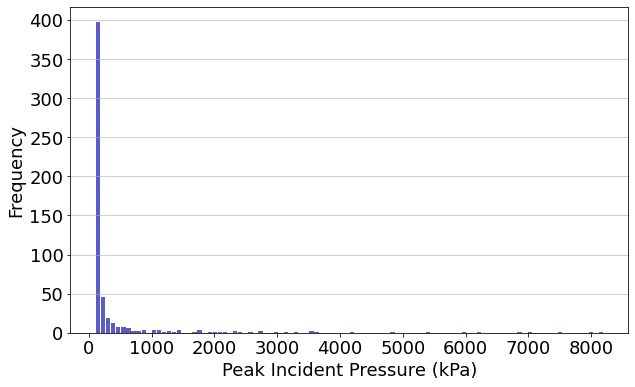

In [21]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Peak incident pressure'], bins= 100, range = (dataset['Peak incident pressure'].min(), dataset['Peak incident pressure'].max()), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peak Incident Pressure (kPa)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
print (maxfreq, maxfreq % 10)
# Set a clean upper y-axis limit.
#plt.ylim(ymax=(np.ceil(maxfreq / 10)+0.5) * 10 if maxfreq % 10 == 0 else maxfreq + 5)
#plt.xlim(250, 8500)

maxfreq 17.0 7.0
103.175


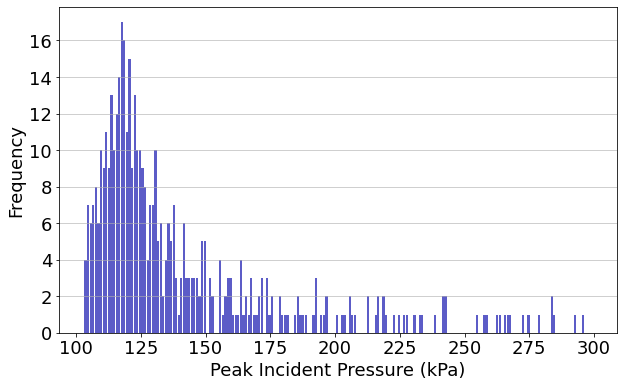

In [24]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Peak incident pressure'], bins = np.arange(dataset['Peak incident pressure'].min(), 300), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peak Incident Pressure (kPa)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
print ('maxfreq',maxfreq, maxfreq % 10)
print (dataset['Peak incident pressure'].min())
# Set a clean upper y-axis limit.
#plt.ylim(ymax=(np.ceil(maxfreq / 10)+1) * 10 if maxfreq % 10 == 0 else maxfreq + 10)
#plt.xlim(0, 500)

max 8100.0


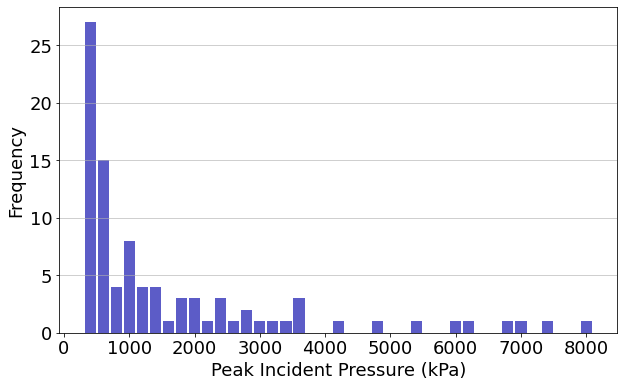

In [22]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x= dataset['Peak incident pressure'], bins = np.arange( 300,dataset['Peak incident pressure'].max(), 200), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peak Incident Pressure (kPa)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
max = bins.max()
print ('max',max)
#print (dataset['Peak incident pressure'].min())
# Set a clean upper y-axis limit.
#plt.ylim(ymax=(np.ceil(maxfreq / 10)+1) * 10 if maxfreq % 10 == 0 else maxfreq + 10)
#plt.xlim(0, 500)

In [27]:
dataset_tnt = pd.read_excel('Dataset3_TNT.xlsx')
dataset_tnt = dataset_tnt.rename(columns={'Charge_type': 'Charge type',
                            'Charge_size' : 'Charge size',
                            'Standoff_distance' : 'Standoff distance',
                            'Incident_pressure' : 'Peak incident pressure'})

(0.0, 21.0)

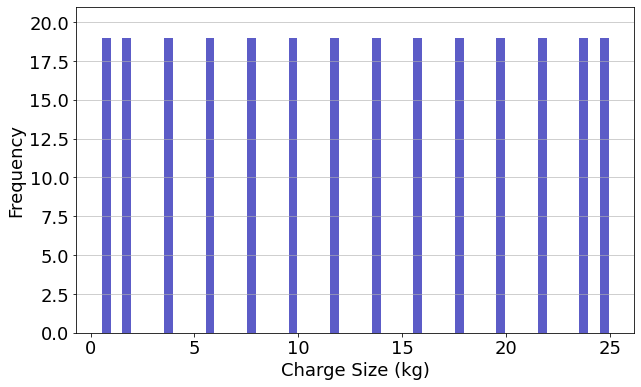

In [28]:
plt.figure(figsize=(10,6))
n1, bins1, patches1 = plt.hist(x= dataset_tnt['Charge size'], bins= np.arange(dataset_tnt['Charge size'].min(), dataset_tnt['Charge size'].max()+1, 0.5), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge Size (kg)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq1 = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq1 / 10) * 10 if maxfreq1 % 10 == 0 else maxfreq1 + 2)

(0.0, 16.0)

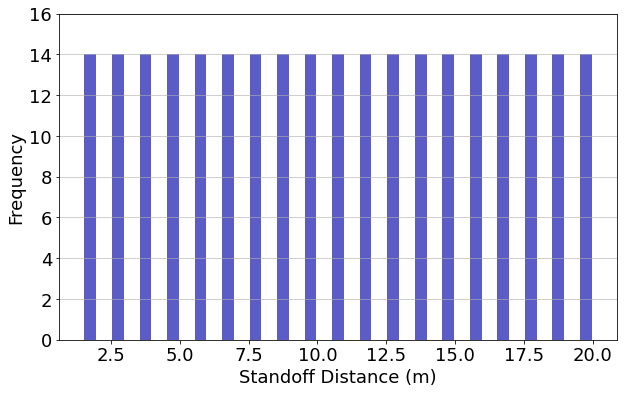

In [29]:
plt.figure(figsize=(10,6))
n2, bins2, patches2 = plt.hist(x= dataset_tnt['Standoff distance'], bins= np.arange(dataset_tnt['Standoff distance'].min(), dataset_tnt['Standoff distance'].max()+1, 0.5), color='#0504aa',alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Standoff Distance (m)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq2 = n2.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq2 / 10) * 10 if maxfreq2 % 10 ==0 else maxfreq2 + 2)

In [30]:
dataset_compb = pd.read_excel('Dataset3_CompB.xlsx')
dataset_compb = dataset_compb.rename(columns={'Charge_type': 'Charge type',
                            'Charge_size' : 'Charge size',
                            'Standoff_distance' : 'Standoff distance',
                            'Incident_pressure' : 'Peak incident pressure'})

20.0


(0.0, 22.0)

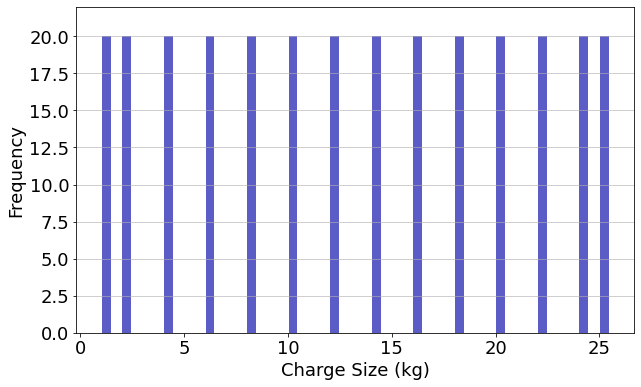

In [38]:
plt.figure(figsize=(10,6))
n3, bins3, patches3 = plt.hist(x= dataset_compb['Charge size'], bins= np.arange(dataset_compb['Charge size'].min(), dataset_compb['Charge size'].max()+1, 0.5), color='#0504aa',
                            alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge Size (kg)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq3 = n3.max()
print (maxfreq3)
# Set a clean upper y-axis limit.
plt.ylim(0, maxfreq3+2)

(0.0, 16.0)

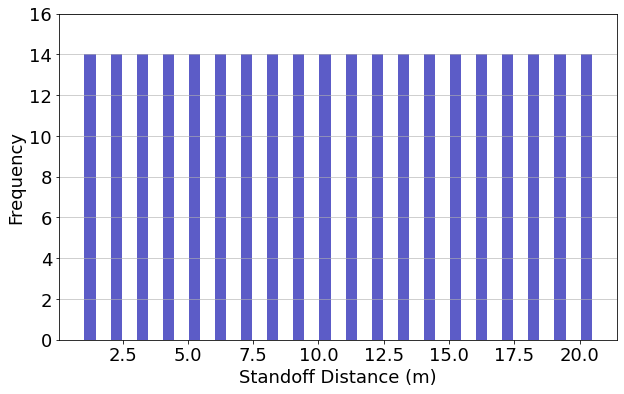

In [40]:
plt.figure(figsize=(10,6))
n4, bins4, patches4 = plt.hist(x= dataset_compb['Standoff distance'], bins= np.arange(dataset_compb['Standoff distance'].min(), dataset_compb['Standoff distance'].max()+1, 0.5), color='#0504aa',alpha=0.65, rwidth=0.85)
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Standoff Distance (m)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq4 = n4.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq4 / 10) * 10 if maxfreq4 % 10 ==0 else maxfreq4 + 2)

## Both in one

(0.0, 22.0)

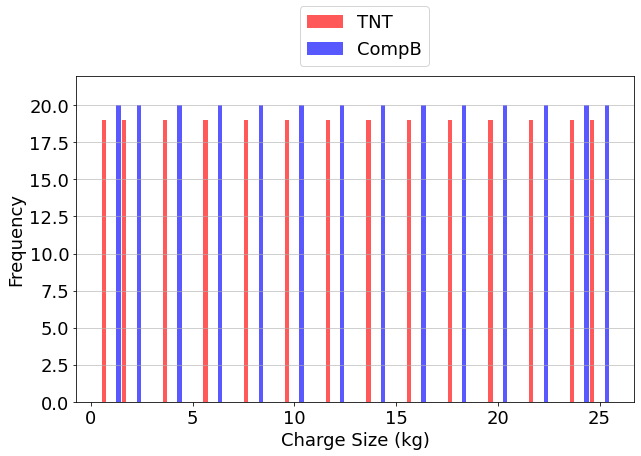

In [50]:
plt.figure(figsize=(10,6))
n5, bins5, patches5 = plt.hist(x= [dataset_tnt['Charge size'],dataset_compb['Charge size']], bins= np.arange(dataset_tnt['Charge size'].min(), dataset_compb['Charge size'].max()+1, 0.5),
                               color=['Red', 'Blue'],alpha=0.65, rwidth=0.85, label = ['TNT', 'CompB'])
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge Size (kg)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq5 = n5.max()
plt.legend(loc=[0.4,1.03])
# Set a clean upper y-axis limit.
plt.ylim(0, maxfreq5 + 2)

(0.0, 16.0)

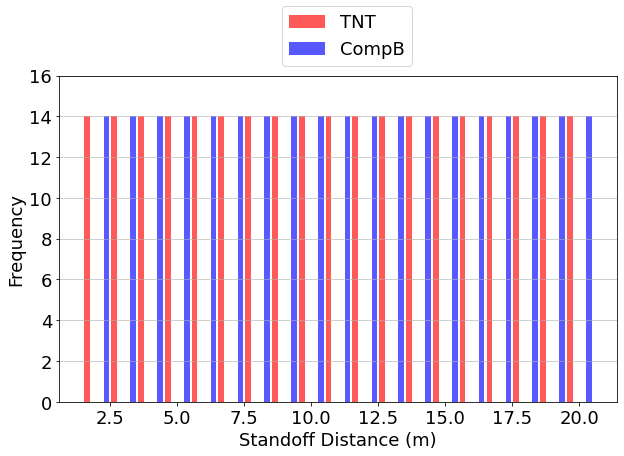

In [56]:
plt.figure(figsize=(10,6))
n6, bins6, patches6 = plt.hist(x= [dataset_tnt['Standoff distance'],dataset_compb['Standoff distance']], bins= np.arange(dataset_tnt['Standoff distance'].min(), dataset_compb['Standoff distance'].max()+1, 0.5),
                               color=['Red', 'Blue'],alpha=0.65, rwidth=0.85, label = ['TNT', 'CompB'])
plt.rcParams['font.size'] = 18
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Standoff Distance (m)')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq6 = n6.max()
plt.legend(loc=[0.4,1.03])
# Set a clean upper y-axis limit.
plt.ylim(0, maxfreq6 + 2)